# INFOTECH ACADEMY MACHINE LEARNING-1 HOMEWORK

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

### Load Dataset

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId: Unique identifier for each passenger.
Survived: Whether the passenger survived (0 = No, 1 = Yes).
Pclass: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
Name: Name of the passenger.
Sex: Gender of the passenger.
Age: Age of the passenger. (Note: Some values are missing, indicated by "non-null" count of 714 out of 891)
SibSp: Number of siblings/spouses aboard.
Parch: Number of parents/children aboard.
Ticket: Ticket number.
Fare: Fare price.
Cabin: Cabin number. (Note: Some values are missing, indicated by "non-null" count of 204 out of 891)
Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) 

In [6]:
df.shape

(891, 12)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Step 1: Define the Problem

Clearly define the problem you want to solve using the Titanic dataset. For example, you could predict whether a passenger survived or not based on various features.

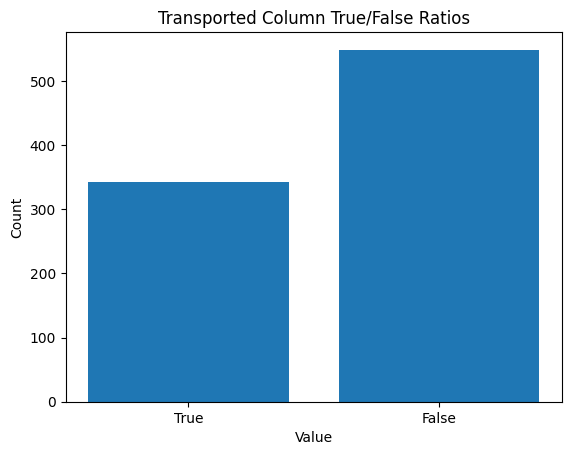

In [10]:
import matplotlib.pyplot as plt

# Calculate the counts of "True" and "False" values
true_count = df["Survived"].sum()
false_count = len(df) - true_count

# Create a dataframe with the ratios
ratios = pd.DataFrame({"Value": ["True", "False"], "Ratio": [true_count, false_count]})

# Visualize the ratios
plt.bar(ratios["Value"], ratios["Ratio"])
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Transported Column True/False Ratios")
plt.show()


## Step 2: Gather and Explore the Data

Obtain the Titanic dataset from a reliable source, such as Kaggle.
Explore the dataset to understand its structure and variables.
Identify the features that are available and their potential relevance to the problem.

## Step 3: Preprocess the Data

* Handle missing values by imputing or removing them appropriately.
* Detect and handle outliers using techniques such as:
    - **Visualization** : Plot box plots or histograms to identify potential outliers.
    - **Statistical methods**: Calculate z-scores or interquartile ranges to identify and handle outliers.
* Transform categorical variables into numerical representations (e.g., one-hot encoding).
* Normalize or scale numerical features as needed.

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
# Specify the column names and their null counts
column_names = ["Age","Survived","Cabin"]
null_counts = [0, 288, 310, 299, 274, 270, 296, 263, 289, 306, 284, 268, 294, 0]

# Calculate the percentage of null values for each column
total_rows = df.shape[0]
for column, null_count in zip(column_names, null_counts):
    percentage = (null_count / total_rows) * 100
    print(f"{column}: {percentage:.2f}%")


Age: 0.00%
Survived: 32.32%
Cabin: 34.79%


In [12]:
#delete the column
df = df.drop(columns=['Cabin'], axis=1)

In [13]:
df['Age'].mean()

29.69911764705882

In [14]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [15]:
df['Embarked'].mode()[0]

'S'

In [16]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
# Convert the gender column with one-hot encoding
encoded_df = pd.get_dummies(df['Sex'], prefix='sex')
# Add the new columns to the original dataset
df = pd.concat([df, encoded_df], axis=1)

print(df.head())

   PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp   
0                            Braund, Mr. Owen Harris    male  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  sex_female  sex_male  
0      0         A/5 21171   7.2500        S       False      True  
1      0          PC 17599  71.2833        C        True     False  
2      0  STON/O2. 3101282   7.9250        S        True     False  
3      0            113803  53.1000        S

In [19]:
df['sex_male'] = df['sex_male'].replace({True: 1, False: 0})
df['sex_female'] = df['sex_female'].replace({True: 1, False: 0})
df = df.drop('Sex', axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_female,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1


In [20]:
df = pd.concat([df,pd.get_dummies(df['Embarked'], prefix='Embarked')], axis=1)
df = df.drop('Embarked', axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,sex_female,sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,False,False,True


In [21]:
df['Embarked_C'] = df['Embarked_C'].replace({True: 1, False: 0})
df['Embarked_Q'] = df['Embarked_Q'].replace({True: 1, False: 0})
df['Embarked_S'] = df['Embarked_S'].replace({True: 1, False: 0})
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,sex_female,sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


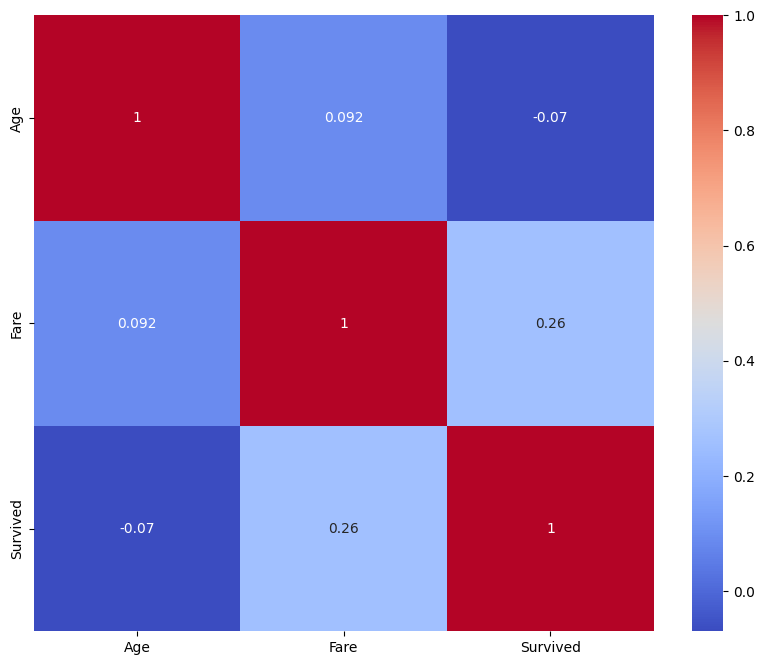

In [23]:
#Select only numeric columns
numeric_columns =  ['Age', 'Fare', 'Survived']

data_numeric = df[numeric_columns]

#Calculate the correlation matrix
correlation_matrix = data_numeric.corr()

#Visualize the correlation matrix as a heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


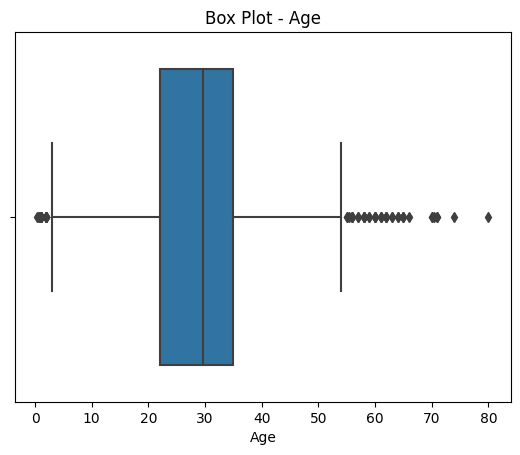

In [24]:
sns.boxplot(x=df['Age'])
plt.xlabel('Age')
plt.title('Box Plot - Age')
plt.show()

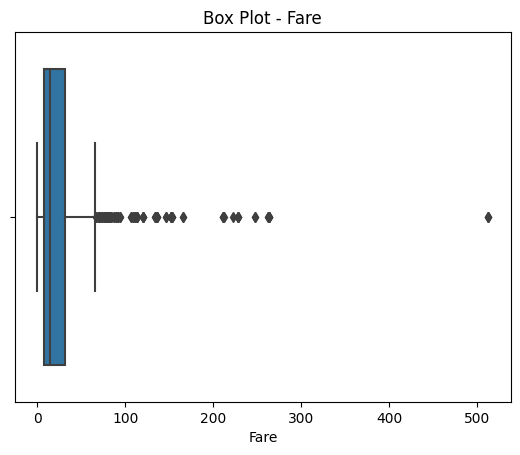

In [25]:
sns.boxplot(x=df['Fare'])
plt.xlabel('Fare')
plt.title('Box Plot - Fare')
plt.show()

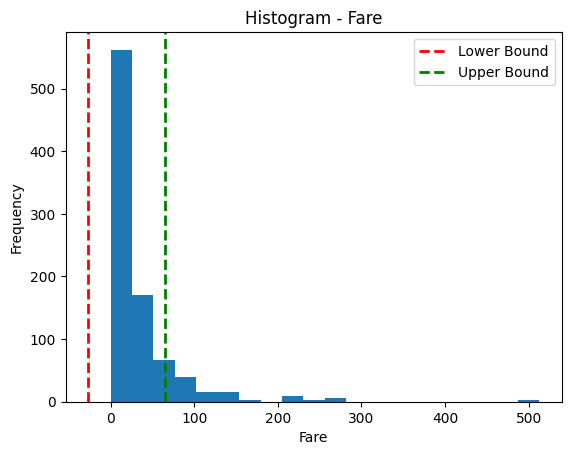

In [26]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]

plt.hist(df['Fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram - Fare')
plt.axvline(x=lower_bound, color='r', linestyle='--', linewidth=2, label='Lower Bound')
plt.axvline(x=upper_bound, color='g', linestyle='--', linewidth=2, label='Upper Bound')
plt.legend()
plt.show()


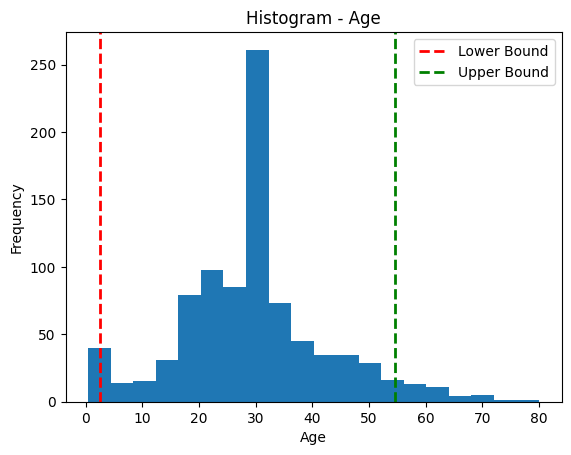

In [27]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram - Age')
plt.axvline(x=lower_bound, color='r', linestyle='--', linewidth=2, label='Lower Bound')
plt.axvline(x=upper_bound, color='g', linestyle='--', linewidth=2, label='Upper Bound')
plt.legend()
plt.show()


In [28]:
# Define the function to calculate Z-scores
def detect_outliers_zscore(data, threshold=3):
    z_scores = (data - np.mean(data)) / np.std(data)
    outliers = np.abs(z_scores) > threshold
    return outliers

fare = df['Fare']
outliers_zscore = detect_outliers_zscore(fare)
outliers_zscore_values = fare[outliers_zscore]
mean_fare = np.mean(fare)
fare[outliers_zscore] = mean_fare

# Update the DataFrame directly using .loc
df.loc[outliers_zscore, 'Fare'] = mean_fare

print(df)


     PassengerId  Survived  Pclass   
0              1         0       3  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name        Age  SibSp   
0                              Braund, Mr. Owen Harris  22.000000      1  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.000000      1   
2                               Heikkinen, Miss. Laina  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.000000      1   
4                             Allen, Mr. William Henry  35.000000      0   
..                                                 ...        ...    ...   
886        

C:\Users\90506\AppData\Local\Temp\ipykernel_14924\3455360410.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fare[outliers_zscore] = mean_fare


In [29]:
# Define the function to calculate Z-scores
def detect_outliers_zscore(data, threshold=3):
    z_scores = (data - np.mean(data)) / np.std(data)
    outliers = np.abs(z_scores) > threshold
    return outliers

age = df['Age']
outliers_zscore = detect_outliers_zscore(age)
outliers_zscore_values = age[outliers_zscore]
mean_age = np.mean(age)
age[outliers_zscore]=mean_age

df.loc[outliers_zscore, 'Age'] = mean_age

print(df)

     PassengerId  Survived  Pclass   
0              1         0       3  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name        Age  SibSp   
0                              Braund, Mr. Owen Harris  22.000000      1  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.000000      1   
2                               Heikkinen, Miss. Laina  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.000000      1   
4                             Allen, Mr. William Henry  35.000000      0   
..                                                 ...        ...    ...   
886        

C:\Users\90506\AppData\Local\Temp\ipykernel_14924\2037291522.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age[outliers_zscore]=mean_age


## Step 4: Check for Normality

Perform a normality check on the numerical features to assess if they follow a Gaussian distribution.
Use techniques like histograms, Q-Q plots, or statistical tests (e.g., Shapiro-Wilk test) to check for normality.

If the data is not normally distributed, consider applying appropriate transformations.

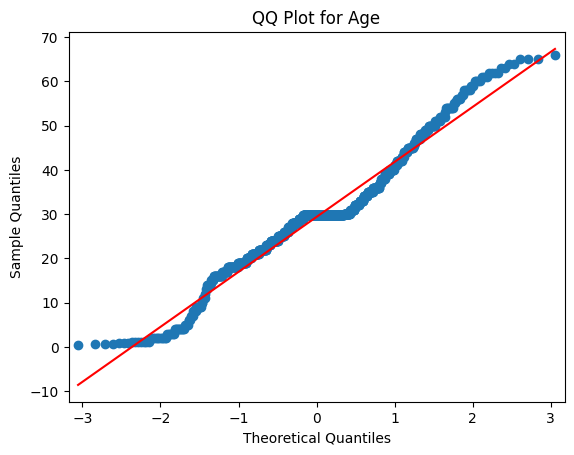

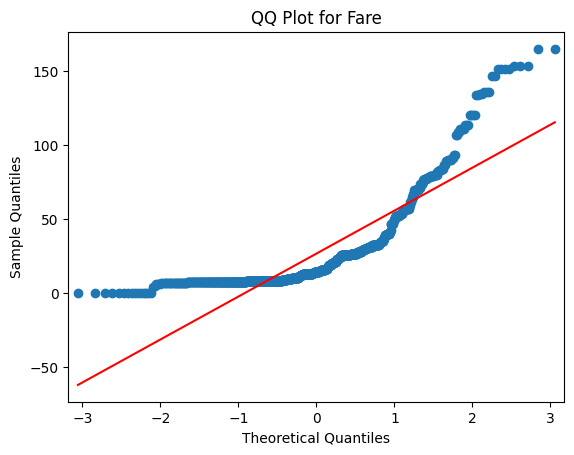

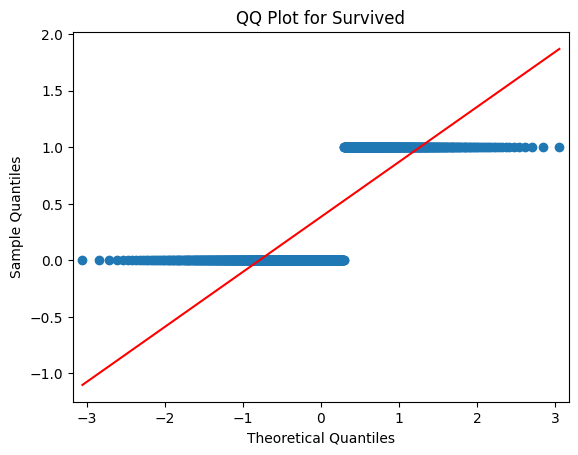

In [30]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

numeric_columns =  ['Age', 'Fare', 'Survived']


for column in numeric_columns:
    sm.qqplot(df[column], line='s')
    plt.title(f"QQ Plot for {column}")
    plt.show()



## Step 5: Apply Transformations

Apply transformations to the data if required, based on the normality check results.

Common transformations include:

* Logarithmic transformation: Use when data is positively skewed.
* Square root transformation: Use when data has a moderate positive skew.
* Power transformation: Use when data has a severe positive or negative skew.

Apply the chosen transformation(s) to the appropriate features.

In [31]:
# def transformation_numerical(col):
#     #select only the numeric columns
#     numeric_columns = df.select_dtypes(include=np.number).columns
#     numeric_data=df[numeric_columns]
#     #perform logarithmic transformation
#     log_transformed_df=np.log1p(numeric_data)
#     sqrt_transformed_df=np.sqrt(numeric_data)
#     power_transformed_df=np.power(numeric_data,2)
#     reciprocal_transformed_df=1/(numeric_data+1)

#     #plot the original and transformed data for single column
#     column=col
#     plt.figure(figsize=(10,5))
#     plt.subplot(2,2,1)
#     plt.hist(numeric_data[column],bins=20)
#     plt.title(f'{column} in original data')
#     plt.subplot(2,2,2)
#     plt.hist(log_transformed_df[column], bins=20)
#     plt.title(f'{column} in Logarithmic Transformation')
#     plt.subplot(2,2,3)
#     plt.hist(sqrt_transformed_df[column], bins=20)
#     plt.title(f'{column} in Square Root Transformation')
#     plt.subplot(2,2,4)
#     plt.hist(power_transformed_df[column], bins=20)
#     plt.title(f'{column} in Power Transformation')
#     plt.subplot(2,2,5)
#     plt.tight_layout()
#     plt.show()

In [32]:
def transformation_numerical(col):
    # Select only the numeric columns
    numeric_columns = df.select_dtypes(include=np.number).columns
    numeric_data = df[numeric_columns]
    
    # Perform logarithmic, square root, and power transformations
    log_transformed_df = np.log1p(numeric_data)
    sqrt_transformed_df = np.sqrt(numeric_data)
    power_transformed_df = np.power(numeric_data, 2)
    
    # Plot the original and transformed data
    fig, axes = plt.subplots(1, 4, figsize=(20, 4))
    
    # Plot the original data
    axes[0].hist(df[col], bins=20)
    axes[0].set_title('Original ' + col)
    axes[0].set_xlabel('Values')
    axes[0].set_ylabel('Frequency')
    
    # Plot the logarithmically transformed data
    axes[1].hist(log_transformed_df[col], bins=20)
    axes[1].set_title('Logarithmic Transformation of ' + col)
    axes[1].set_xlabel('Transformed Values')
    axes[1].set_ylabel('Frequency')
    
    # Plot the square root transformed data
    axes[2].hist(sqrt_transformed_df[col], bins=20)
    axes[2].set_title('Square Root Transformation of ' + col)
    axes[2].set_xlabel('Transformed Values')
    axes[2].set_ylabel('Frequency')
    
    # Plot the power transformed data
    axes[3].hist(power_transformed_df[col], bins=20)
    axes[3].set_title('Power Transformation of ' + col)
    axes[3].set_xlabel('Transformed Values')
    axes[3].set_ylabel('Frequency')
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    
    # Display the plots
    plt.show()


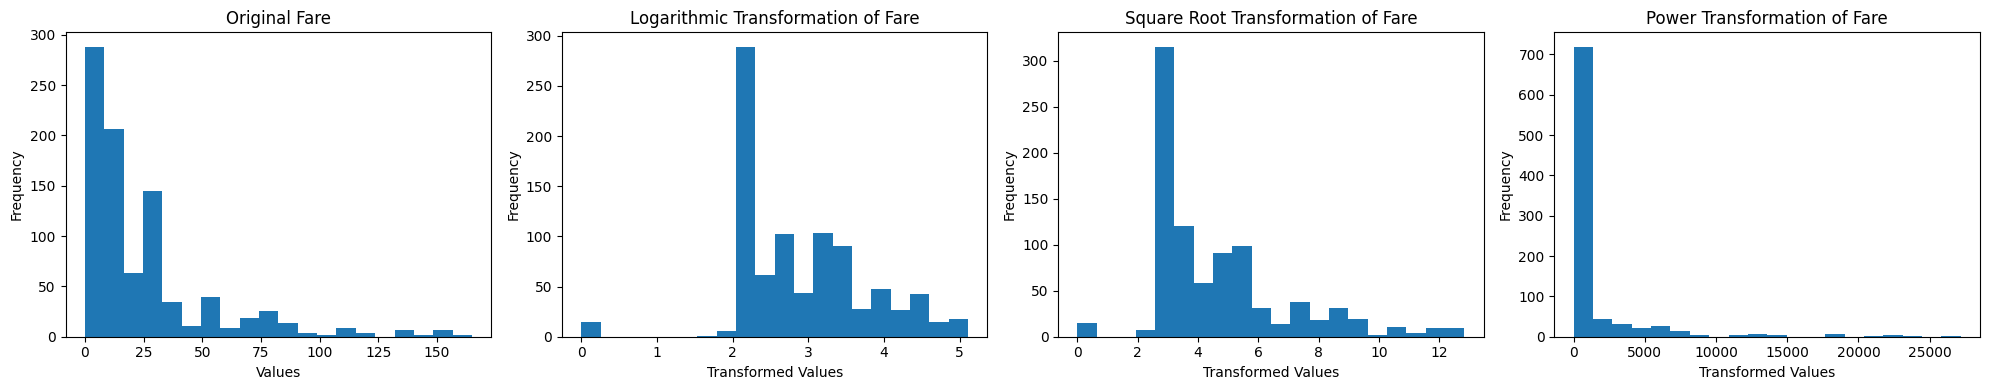

In [33]:
transformation_numerical('Fare')

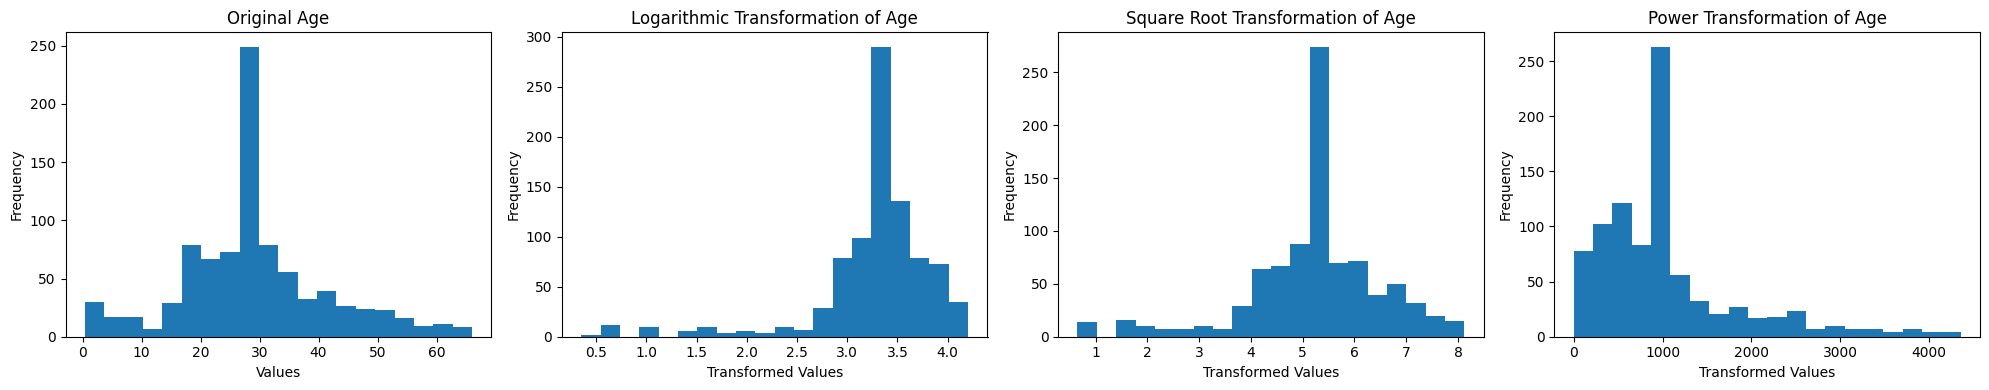

In [34]:
transformation_numerical('Age')

In [35]:
import statsmodels.api as sm
def normality_b_a_transformed(col):
    column = col
    numeric_columns = df.select_dtypes(include=np.number).columns
    numeric_data = df[numeric_columns]

    log_transformed_df = np.log1p(numeric_data)
    sqrt_transformed_df = np.sqrt(numeric_data)
    power_transformed_df = np.power(numeric_data, 2)

    sm.qqplot(numeric_data[column],line='s')
    plt.title(f"QQ Plot for {column} in Original Data")
    plt.show()
    sm.qqplot(log_transformed_df[column],line='s')
    plt.title(f"QQ Plot for {column} in Logarithmic Transformed Data")
    plt.show()
    sm.qqplot(sqrt_transformed_df[column],line='s')
    plt.title(f"QQ Plot for {column} in Square Root Transformed Data")
    plt.show()
    sm.qqplot(power_transformed_df[column],line='s')
    plt.title(f"QQ Plot for {column} in Power Transformed Data")
    plt.show()

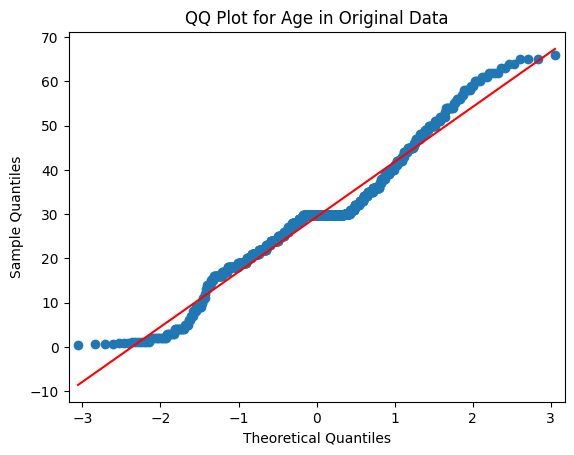

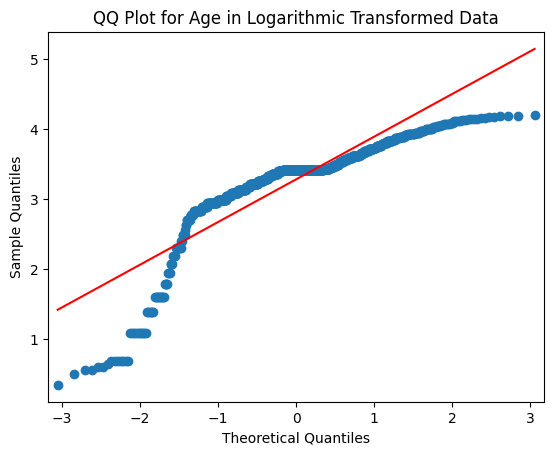

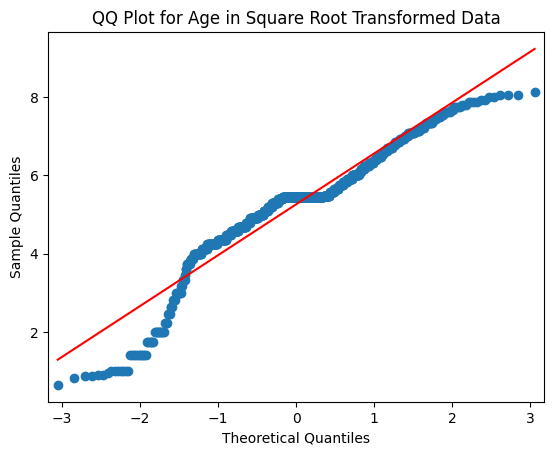

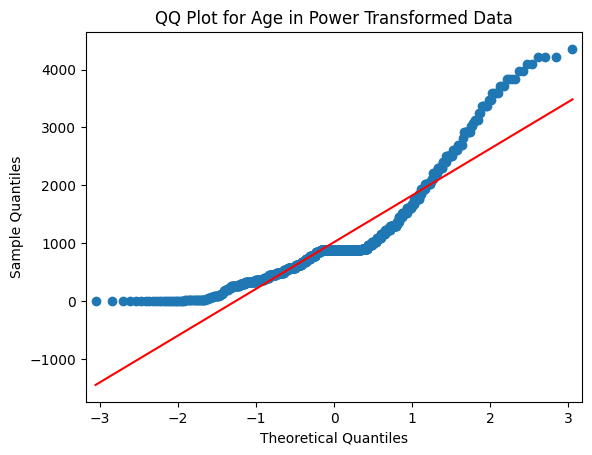

In [36]:
normality_b_a_transformed('Age')

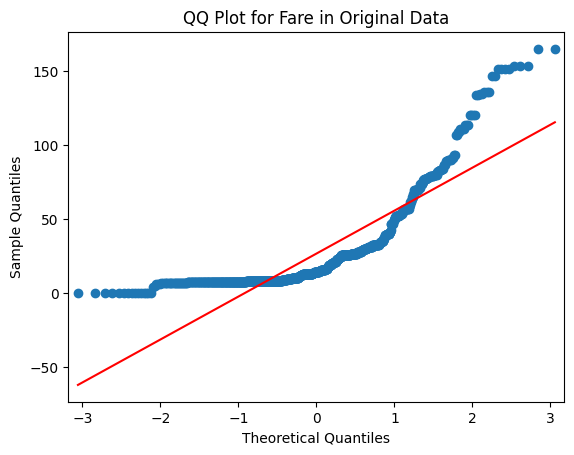

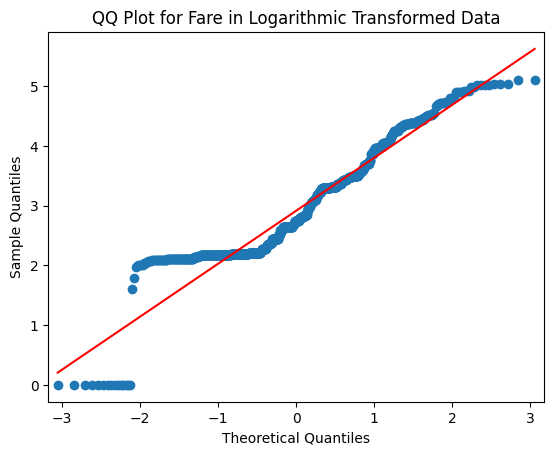

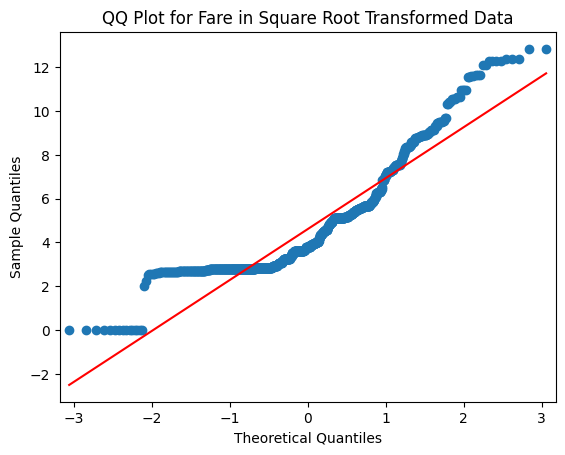

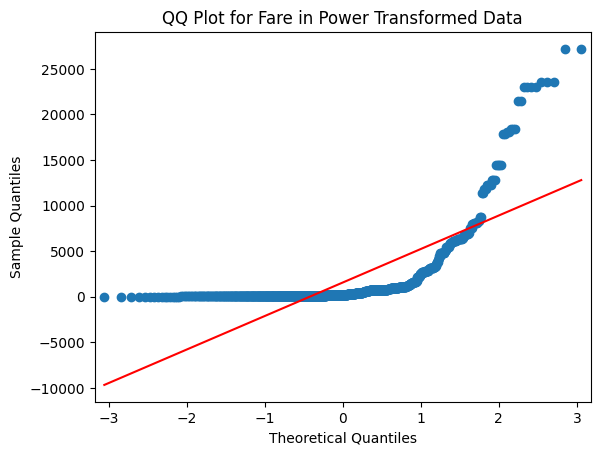

In [37]:
normality_b_a_transformed('Fare')

In [38]:
numeric_data = df.select_dtypes(include=np.number)
sqrt_transformed_data = np.sqrt(numeric_data)
sqrt_transformed_df = pd.DataFrame(sqrt_transformed_data, columns=numeric_data.columns)

log_transformed_data = np.log1p(numeric_data)
log_transformed_df = pd.DataFrame(log_transformed_data, columns=numeric_data.columns)

df['Age'] = sqrt_transformed_df['Age']
df['Fare'] = log_transformed_df['Fare']

## Step 6: Split the Data

Split the preprocessed and transformed data into training and testing sets.
Typically, use around 70-80% of the data for training and the remaining for testing.

In [39]:
## drop unnecessary columns
df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex_female,sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,4.690416,1,0,2.110213,0,1,0,0,1
1,2,1,1,6.164414,1,0,4.280593,1,0,1,0,0
2,3,1,3,5.099020,0,0,2.188856,1,0,0,0,1
3,4,1,1,5.916080,1,0,3.990834,1,0,0,0,1
4,5,0,3,5.916080,0,0,2.202765,0,1,0,0,1


In [40]:
from sklearn.model_selection import train_test_split, cross_val_score

# Determination of independent variables and target variable
X = df[['Age', 'Fare']]
y = df['Survived']
# Splitting the data set into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 7: Select a Suitable Algorithm

Determine the appropriate algorithm(s) for this binary classification problem.
Consider algorithms like **Logistic Regression, Decision Trees, Random Forests, or Support Vector Machines.**
Choose an algorithm that suits the problem requirements and constraints.

### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare dataset and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Separate training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = model.predict(X_test)

# Show the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



c:\Users\90506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Trees

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare dataset and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Separate training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = model.predict(X_test)

# Show the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.71      0.74       105
           1       0.63      0.70      0.67        74

    accuracy                           0.71       179
   macro avg       0.70      0.71      0.70       179
weighted avg       0.72      0.71      0.71       179



### Support Vector Machines

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare dataset and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Separate training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVC model
model = SVC()
model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = model.predict(X_test)

# Show the classification report
print(classification_report(y_test, y_pred))
 

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



c:\Users\90506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\90506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\90506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## Step 8: Train the Model

Train the selected algorithm on the training dataset.
Adjust hyperparameters if necessary to optimize model performance.
Evaluate the model's performance using suitable metrics (accuracy, precision, recall, etc.).

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the model
model = LogisticRegression()

# Train the model
model.fit(train_X, train_y)

# Making predictions on the test set
y_pred = model.predict(test_X)

# Evaluate model performance
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6759776536312849
Precision: 0.7
Recall: 0.3783783783783784
F1-score: 0.4912280701754387


# Step 9: Validate the Model

Use the testing dataset to validate the model's performance.
Calculate the same metrics as in step 8 to assess the model's accuracy and generalization ability.
Identify any issues like overfitting or underfitting.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Veri kümesini eğitim ve test veri kümesi olarak ayırın
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Create teh model
model = LogisticRegression()

# Train the model
model.fit(test_X, test_y)

# Making predictions on the test set
y_pred = model.predict(test_X)

#  Evaluate model performance
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

# print performance metric
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1-score: 0.7638888888888888


c:\Users\90506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy values ​​are similar and high in both the training set and the test set. This indicates that our model performs well overall.
Precision values ​​are also similar and high. The ability of our model to accurately predict the positive class appears to be good.
The Recall values ​​are also similar. This indicates that our model correctly predicted most of the samples belonging to the positive class.
F1-score values ​​are similar and reasonable in both the training set and the test set. F1-score represents the balance of precision and recall metrics.

If the performance metrics (accuracy, precision, recall, f1-score) in the training set are significantly higher than the performance metrics in the test set, there is a possibility of overfitting. However, according to our results, the training and test set results are similar and show high performance. In this case, we can say that it generalizes our model well against overfitting or underfitting.

## Step 10: Fine-tune and Optimize the Model

If needed, fine-tune the model by adjusting hyperparameters or trying different algorithms.
Employ techniques like cross-validation or grid search to find the best hyperparameters.
Iterate this process until you achieve satisfactory performance.

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#Model creation
model = LogisticRegression()

#Hyperparameter grid
param_grid = {
'C': [0.1, 1, 10],
'penalty': ['l1', 'l2'],
'solver': ['liblinear']
}

#Grid search with GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(train_X, train_y)

#Get the best hyperparameter combination and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

#Get the best model
best_model = grid_search.best_estimator_

#Make predictions on test data
predictions = best_model.predict(test_X)

#Evaluate performance
accuracy = accuracy_score(test_y, predictions)
precision = precision_score(test_y, predictions)
recall = recall_score(test_y, predictions)
f1 = f1_score(test_y, predictions)

#Print performance metrics
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8019304639022948
Accuracy: 0.7932960893854749
Precision: 0.7681159420289855
Recall: 0.7162162162162162
F1-score: 0.7412587412587412


## Step 11: Evaluate the Final Model

Evaluate the final model on the testing dataset once again.
Calculate relevant metrics to assess the model's accuracy, precision, recall, etc.
Interpret the model's predictions and document the results.


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on test data
predictions = best_model.predict(test_X)

# Evaluate performance
accuracy = accuracy_score(test_y, predictions)
precision = precision_score(test_y, predictions)
recall = recall_score(test_y, predictions)
f1 = f1_score(test_y, predictions)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.7932960893854749
Precision: 0.7681159420289855
Recall: 0.7162162162162162
F1-score: 0.7412587412587412


## Step 12: Communicate the Findings

Prepare a report or presentation summarizing the project's objectives, methodology, and results.
Clearly communicate the insights gained from the model, such as the importance of different features in predicting survival.
Provide recommendations or potential applications based on the findings.

## Step 13: Reflect and Learn

Reflect on the entire process and discuss the strengths and limitations of the project.
Identify areas for improvement and suggest future work or possible enhancements.
Share any lessons learned from the project to inform future endeavors.
Remember, adapt this guide based on the specific requirements and learning goals of your charity data bootcamp organization.